In [350]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,StandardScaler,power_transform
from sklearn. preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#importing dataset from GitHub to jupyter notebook

In [315]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [ ]:
#loading into dataframe

In [316]:
df=pd.DataFrame(data=df)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
#getting a count of rows and colums. 8124 rows and 23 columns

In [317]:
df.shape

(8124, 23)

In [ ]:
#inspecting the datatypes. #to decide whether to use encoder or not

In [318]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
#checking for missing/null values.#below indicates there are no nullvalues in the dataset

In [319]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

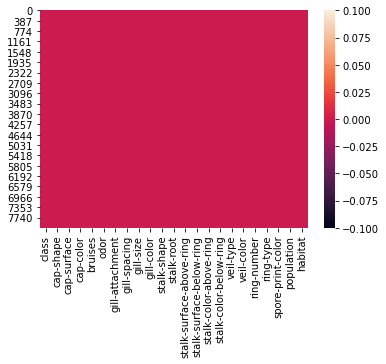

In [320]:
sn.heatmap(df.isnull()) 

In [ ]:
#No white lines confirms no missing values

In [ ]:
#Exploratory Data Analysis

In [321]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#data is categorical .so using label encoding

In [322]:
labelencoder =LabelEncoder()

In [323]:
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [324]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
#veil type is mostly zero ,removing it

In [325]:
df=df.drop(["veil-type"],axis=1)

In [326]:
df.describe() #this shows skewness in data (there is diff between mean and std) and outliers (diff etween max and mean value)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [ ]:
#to check on data imbalance

Text(0.5, 0, 'class')

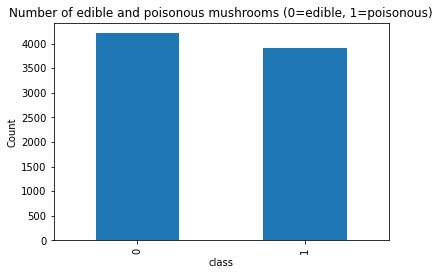

In [327]:
plt.figure()
plt.title('Number of edible and poisonous mushrooms (0=edible, 1=poisonous)')
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")


In [328]:
#Both classes are balanced


In [ ]:
##checking correlation

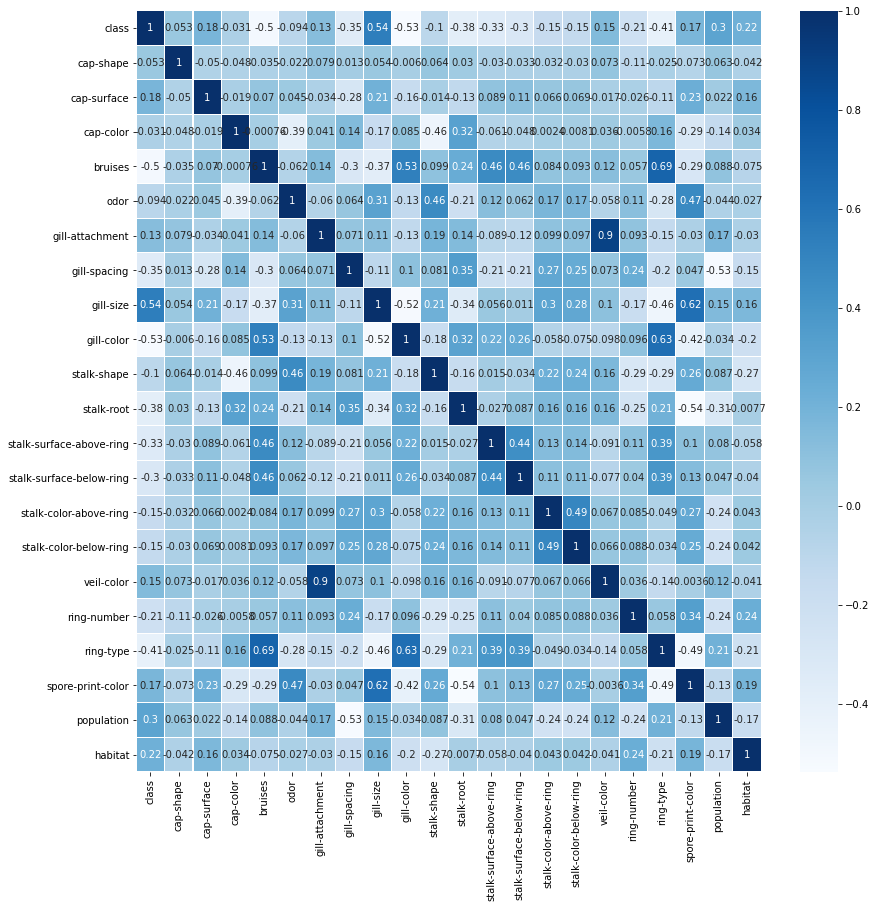

In [329]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),linewidths=.1,cmap="Blues", annot=True)


In [ ]:
#Since there are lot of columns,it is difficult to read teh heat map

In [330]:
corr_matrix=df.corr()
corr_matrix["class"].sort_values(ascending = False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

In [ ]:
#correaltion of target variable  with independent varaiable in a single table . we can understand that gill-colour is having least correlation 

In [ ]:
#Checking outliers

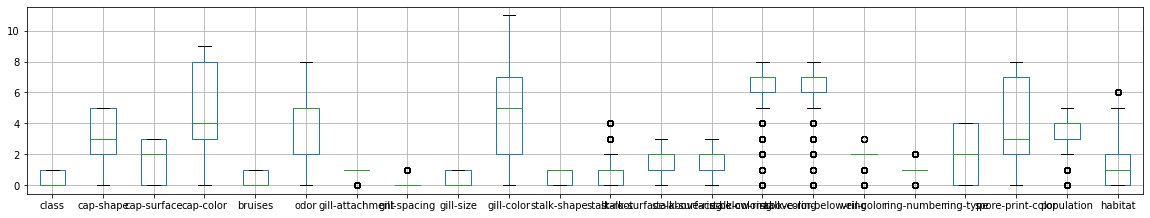

In [332]:
df.boxplot(figsize=(20,20))
plt.subplots_adjust(bottom=0.75)
plt.show()

In [ ]:
#remove outliers  #always do before splitting data

In [333]:
z=np.abs(zscore(df))
z.shape

(8124, 22)

In [334]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123]), array([15, 14, 15, ..., 16,  6, 16]))


In [335]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(8124, 22)
(6568, 22)


In [336]:
loss_percentage=(8124-6568)/8124*100
print(loss_percentage)

19.15312653865091


In [ ]:
#not an acceptable loss percentage.So not removing outliers

In [337]:
#checking skewness
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [253]:
df.skew() #data set is having skewness.anything >0.5 and <-0.5 indicates skewness and needs to be removed

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [ ]:
#skewness by plot  #most of the data is skewed

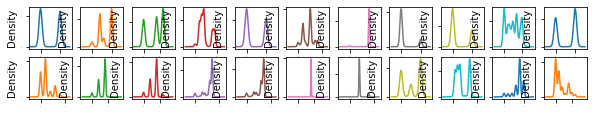

In [338]:
df.plot(kind="density",subplots=True,layout=(11,11),sharex=False,legend =False,fontsize=1,figsize=(10,10))
plt.show()

In [ ]:
#Splitting data

In [255]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [339]:
y=df["class"]
X=df.drop("class",axis=1)

In [270]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [268]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [259]:
#X=df.iloc[:,-1]
#y=df.iloc[:,:-1]

In [ ]:
#removing skewness

In [340]:
X=pd.DataFrame(power_transform(X,method="yeo-johnson"))
X.skew()

0    -0.205860
1    -0.473764
2     0.004059
3     0.342750
4    -0.144660
5    -5.977076
6     1.840088
7     0.825797
8    -0.246738
9    -0.271345
10    0.023182
11   -0.438332
12   -0.114150
13   -0.964471
14   -0.925320
15    5.797741
16   -0.499098
17   -0.339232
18    0.018174
19   -0.368219
20    0.123132
dtype: float64

In [ ]:
#skewness is not removed 

In [218]:
y

0       0.0
1      -inf
2      -inf
3       0.0
4      -inf
       ... 
8119   -inf
8120   -inf
8121   -inf
8122    0.0
8123   -inf
Name: class, Length: 8124, dtype: float64

In [212]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.609438,0.693147,1.386294,0.0,1.791759,0.0,-inf,0.0,1.386294,-inf,...,0.693147,0.693147,1.945910,1.945910,0.693147,0.0,1.386294,0.693147,1.098612,1.609438
1,1.609438,0.693147,2.197225,0.0,-inf,0.0,-inf,-inf,1.386294,-inf,...,0.693147,0.693147,1.945910,1.945910,0.693147,0.0,1.386294,1.098612,0.693147,0.000000
2,-inf,0.693147,2.079442,0.0,1.098612,0.0,-inf,-inf,1.609438,-inf,...,0.693147,0.693147,1.945910,1.945910,0.693147,0.0,1.386294,1.098612,0.693147,1.098612
3,1.609438,1.098612,2.079442,0.0,1.791759,0.0,-inf,0.0,1.609438,-inf,...,0.693147,0.693147,1.945910,1.945910,0.693147,0.0,1.386294,0.693147,1.098612,1.609438
4,1.609438,0.693147,1.098612,-inf,1.609438,0.0,0.0,-inf,1.386294,0.0,...,0.693147,0.693147,1.945910,1.945910,0.693147,0.0,-inf,1.098612,-inf,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.098612,0.693147,1.386294,-inf,1.609438,-inf,-inf,-inf,2.397895,-inf,...,0.693147,0.693147,1.609438,1.609438,0.000000,0.0,1.386294,-inf,0.000000,0.693147
8120,1.609438,0.693147,1.386294,-inf,1.609438,-inf,-inf,-inf,2.397895,-inf,...,0.693147,0.693147,1.609438,1.609438,-inf,0.0,1.386294,-inf,1.386294,0.693147
8121,0.693147,0.693147,1.386294,-inf,1.609438,-inf,-inf,-inf,1.609438,-inf,...,0.693147,0.693147,1.609438,1.609438,0.000000,0.0,1.386294,-inf,0.000000,0.693147
8122,1.098612,1.098612,1.386294,-inf,2.079442,0.0,-inf,0.0,-inf,0.0,...,0.693147,0.000000,1.945910,1.945910,0.693147,0.0,-inf,1.945910,1.386294,0.693147


In [341]:
SC=StandardScaler()
X=pd.DataFrame(SC.fit_transform(X),columns=X.columns)


In [ ]:
#Training Models


In [343]:
maxacc=0
maxrs=0

for i in range(1,200):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(X_train,y_train)
    pred=mod.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
                                                    
print("Max accuracy is at",acc*100,"at random state",i)


Max accuracy is at 100.0 at random state 199


In [344]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33)

In [345]:
def eval(X):
    mod=X
    mod.fit(X_train,y_train)
    pred=mod.predict(X_test)
    print("accuracy score is ",accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [ ]:
#DecisionTreeClassifier

In [346]:
eval(DecisionTreeClassifier())


accuracy score is  1.0
[[1393    0]
 [   0 1288]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1393
           1       1.00      1.00      1.00      1288

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [ ]:
#RandomForestClassifier

In [347]:
eval(RandomForestClassifier())



accuracy score is  1.0
[[1393    0]
 [   0 1288]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1393
           1       1.00      1.00      1.00      1288

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [ ]:
#svc

In [348]:
eval(SVC())

accuracy score is  0.9992540096978739
[[1391    2]
 [   0 1288]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1393
           1       1.00      1.00      1.00      1288

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [ ]:
#LogisticRegression

In [349]:
eval(LogisticRegression())


accuracy score is  0.9544945915703096
[[1335   58]
 [  64 1224]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1393
           1       0.95      0.95      0.95      1288

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681



In [ ]:
#Cross Validation Score

In [309]:
scr=cross_val_score(LogisticRegression(),X,y,cv=5)
print("Cross validation score of Logistic Regression model is :",scr.mean())

Cross validation score of Logistic Regression model is : 0.8209849185297461


In [310]:
scr=cross_val_score(DecisionTreeClassifier(),X,y,cv=5)
print("Cross validation score of DecisionTree Classifier model is :",scr.mean())

Cross validation score of Logistic Regression model is : 0.9596210685865858


In [311]:
scr=cross_val_score(SVC(),X,y,cv=5)
print("Cross validation score of SVC model is :",scr.mean())

Cross validation score of Logistic Regression model is : 0.8623399772641152


In [312]:
scr=cross_val_score(RandomForestClassifier(),X,y,cv=5)
print("Cross validation score of RandomforestClassifier model is :",scr.mean())

Cross validation score of Logistic Regression model is : 0.8941080712391057


In [ ]:
# to determine the best model take diff between accuracy score and cvc

In [ ]:
#dtc=1-.95=0.05
#rfc=1-.89=.11
#lr=0.95-.82=.09
#svc=0.99-.86=0.13

In [ ]:
#decision tree classifier is the best as it has teh least difference

In [ ]:
#Hyper parameter Tuning

In [360]:
parameter ={'max_depth':np.arange(2,10),'çriterion':['gini','entropy']}

In [ ]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
GCV.fit(X_train,y_train)
##Giving error above line.please help

In [ ]:

GCV.best_params_ 

In [373]:
#Final Model --following is throwing error .please help

In [ ]:
#Final_mod=DecisionTreeClassifier(çriterion='entropy',max_depth =4)
#Final_mod.fit(X_train,y_train)
#pred=Final_mod.predict(x_test)
#accu=accuracy_score(y_test,pred)
#print(acc*100)
#Final_mod


In [375]:
Final_mod=DecisionTreeClassifier()
Final_mod.fit(X_train,y_train)
pred=mod.predict(X_test)
print("accuracy score is ",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is  1.0
[[1393    0]
 [   0 1288]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1393
           1       1.00      1.00      1.00      1288

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [377]:
import joblib
joblib.dump(Final_mod,"MushroomProject.pkl")

['MushroomProject.pkl']